# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib.pyplot as plt
# Your work here.
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


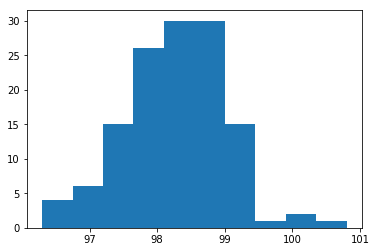

In [3]:
# Q1
plt.hist(df['temperature'])
plt.show()
# The historgram below suggests data is not exactly normal but very close to normal distribution for any analysis.

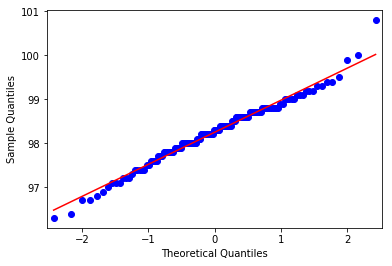

In [4]:
#Quintile plot also suggests that data is very close to normal
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(df['temperature'], line='s')
pyplot.show()

In [5]:
# let's do a statistical test
from scipy.stats import shapiro
stat, p = shapiro(df['temperature'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# P value is .233, so we accept null hypothesis that data came from normal distribution

Statistics=0.987, p=0.233


Based on all three investigations, we can conclude that the data is closely distributed as normal.

Quesiotn 2:
The sample size is fairly large. The normal distribution works when the sample size is greater than 30.
The assumption is the observations are independent. Since each observation was measured for each person indpendently,
the oberservation must be indpendent.



(array([ 10.,  29.,  85., 146., 213., 227., 164.,  89.,  29.,   8.]),
 array([98.04923077, 98.08930769, 98.12938462, 98.16946154, 98.20953846,
        98.24961538, 98.28969231, 98.32976923, 98.36984615, 98.40992308,
        98.45      ]),
 <a list of 10 Patch objects>)

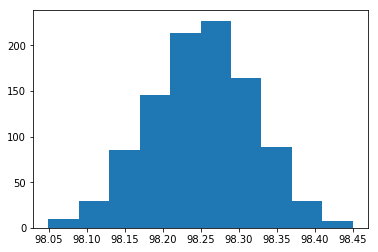

In [7]:
#Q3.Bootstrap Method
import numpy as np
hold_mean=[]
for i in range(1000):
    sample=np.random.choice(df['temperature'],len(df['temperature'])).mean()
    hold_mean.append(sample)
hold_mean
plt.hist(hold_mean)

In [8]:
# Now conduct the test t
import numpy as np
import scipy.stats
bstrap_mean=np.array(hold_mean).mean()
bstrap_std=np.array(hold_mean).std()
print (bstrap_mean, bstrap_std)
sqaure_root_n=np.math.sqrt(130.00)# need to look at it
tt=(bstrap_mean-98.6)/(bstrap_std/sqaure_root_n)
p_value=format(float(format(scipy.stats.t.cdf(tt,len(df.index)),'.9f'))*2,'.18f')
print ('p_value ', p_value)
# We reject the hypothesis that data came from a normal distribution of mean 98.6
# as p value is very very small.


98.2507676923077 0.06779732237124163
p_value  0.000000000000000000


In [9]:
# Quesion 3 frequents test
import numpy as np
import scipy.stats
mean=df['temperature'].mean()
stdd=df['temperature'].std()
denoft=stdd/np.math.sqrt(len(df['temperature']))
tt=(mean-98.6)/denoft
p_value=format(float(format(scipy.stats.t.cdf(tt,len(df.index)),'.9f'))*2,'.9f')
print ('p_value ', p_value)
# The p value is 0.000000238, so reject the hypothesis that the mean temperature is 98.6

p_value  0.000000238


In [10]:
# Question 3 continues for z test - bootstrap
from scipy.stats import norm
bstrap_mean=np.array(hold_mean).mean()
bstrap_std=np.array(hold_mean).std()
sqaure_root_n=np.math.sqrt(130.00)# need to look at it
z=(bstrap_mean-98.6)/(bstrap_std/sqaure_root_n)
p_value=  format(norm.cdf(z)*2, '.9f')
print ('value of z ',z, 'p value ', p_value)
# P value id very small so reject the null hypothesis that the sample came from a normal distribution of mean 98.6

value of z  -58.731832018533076 p value  0.000000000


In [11]:
# Question 3 continues for Z test - frequentists
mean=df['temperature'].mean()
stdd=df['temperature'].std()
denoft=stdd/np.math.sqrt(len(df['temperature']))
tt=(mean-98.6)/denoft
p_value=  format(norm.cdf(z)*2, '.9f')
print ('value of z ',z, 'p value ', p_value)
# P value id very small so reject the null hypothesis that the sample came from a normal distribution of mean 98.6

value of z  -58.731832018533076 p value  0.000000000


I conducted  hypothesis tests based on one sample test and there is no reason to conduct a two-sample test.I performed both t and z tests and the conclusions on the both are same - reject the null hypothesis. The p-value of t is little larger than the p value of z as t has more space at its tails.

In [16]:
# Q4: t test
# Draw a sample of size 10
sample=np.random.choice(df['temperature'],10)
sample
mean=sample.mean()
stdd=sample.std()
denoft=stdd/np.math.sqrt(10)
tt=(mean-98.6)/denoft
p_value=format(float(format(scipy.stats.t.cdf(tt,len(df.index)),'.9f'))*2,'.9f')
print ('p_value ', p_value)
# Since p value varies, we cannot confirm our hypothesis

p_value  0.000616648


In [20]:
#q4 continues with z test
sample=np.random.choice(df['temperature'],10)
mean=sample.mean()
stdd=sample.std()
denoft=stdd/np.math.sqrt(10)
z=tt=(mean-98.6)/denoft
p_value=norm.cdf(z)*2
print (p_value)
# Since p value varies, we cannot confirm our hypothesis

0.7851840573571277


The p values for the both tests vary as they are dependent on the sample and the sample size is very small.
Usually, t test performs better when sample size is small and population variance is not available.

In [21]:
#Q5. Let us t distribution to calculate margin of error and the confidence interval
# First Frequentist approach
import numpy as np
standard_error=df['temperature'].std()
standard_error
sqrt_n=np.math.sqrt(len(df['temperature']))
standard_error_mean=standard_error/sqrt_n

# let's create 95% of confidence interval
upper_critical=scipy.stats.t.ppf(.975,len(df['temperature'])-1)
lower_critical=scipy.stats.t.ppf(.025,len(df['temperature'])-1)
error_of_margins=standard_error_mean*upper_critical
lower_value, upper_value=df['temperature'].mean()-error_of_margins, df['temperature'].mean()+ error_of_margins
#lower_value, upper_value
list_all=list(df['temperature'])
abnormals=[x for x in list_all if x>upper_value or x<lower_value]
print ('error of margin ',error_of_margins,"\nlower bound and upperbound ", lower_value, ',', upper_value,"\nabnormal values - outside of confidence interval bounds\n", abnormals)
# the upper bound and lower bound do not contain the population mean 98.6

error of margin  0.12722786362273047 
lower bound and upperbound  98.12200290560804 , 98.37645863285351 
abnormal values - outside of confidence interval bounds
 [99.3, 98.4, 97.8, 99.2, 98.0, 99.2, 98.0, 98.8, 98.4, 98.6, 98.8, 96.7, 98.7, 97.8, 98.8, 97.2, 99.4, 98.6, 98.4, 97.8, 98.0, 97.8, 98.4, 98.1, 97.6, 98.5, 98.6, 99.3, 99.5, 99.1, 97.9, 96.4, 98.4, 98.4, 96.9, 97.2, 99.0, 97.9, 97.4, 97.4, 97.9, 97.1, 98.9, 98.5, 98.6, 98.6, 98.8, 97.6, 99.1, 98.4, 98.6, 98.7, 97.4, 97.4, 98.6, 98.7, 98.9, 98.1, 97.7, 98.0, 98.8, 99.0, 98.8, 98.0, 98.4, 97.4, 97.6, 98.8, 98.0, 97.5, 99.2, 98.6, 97.1, 98.6, 98.0, 98.7, 98.1, 97.8, 100.0, 98.8, 97.1, 97.8, 96.8, 99.9, 98.7, 98.8, 98.0, 99.0, 98.5, 98.0, 99.4, 97.6, 96.7, 97.0, 98.6, 98.7, 97.3, 98.8, 98.0, 99.1, 99.0, 98.0, 100.8, 97.8, 98.7, 98.4, 97.7, 97.9, 99.0, 97.2, 97.5, 96.3, 97.7, 97.9, 98.7]


In [22]:
#Q5. Let us t distribution to calculate margin of error and the confidence interval
# bootstrap approach
#Q3.Bootstrap Method
hold_mean=[]
for i in range(1000):
    sample=np.random.choice(df['temperature'],len(df['temperature'])).mean()
    hold_mean.append(sample)
hold_mean

standard_error=np.array(hold_mean).std()
standard_error
sqrt_n=np.math.sqrt(len(df['temperature']))
standard_error_mean=standard_error/sqrt_n

# let's create 95% of confidence interval
upper_critical=scipy.stats.t.ppf(.975,len(df['temperature'])-1)
lower_critical=scipy.stats.t.ppf(.025,len(df['temperature'])-1)
error_of_margins=standard_error_mean*upper_critical
lower_value, upper_value=df['temperature'].mean()-error_of_margins, df['temperature'].mean()+ error_of_margins
#lower_value, upper_value
list_all=list(df['temperature'])
abnormals=[x for x in list_all if x>upper_value or x<lower_value]
print ('error of margin ',error_of_margins,"\nlower bound and upperbound ", lower_value, ',', upper_value,"\nabnormal values - outside of confidence interval bounds\n", abnormals)
# the upper bound and lower bound do not contain the population mean 98.6



error of margin  0.011036346443139475 
lower bound and upperbound  98.23819442278764 , 98.26026711567391 
abnormal values - outside of confidence interval bounds
 [99.3, 98.4, 97.8, 99.2, 98.0, 99.2, 98.0, 98.8, 98.4, 98.6, 98.8, 96.7, 98.2, 98.7, 97.8, 98.8, 98.3, 98.2, 97.2, 99.4, 98.3, 98.2, 98.6, 98.4, 97.8, 98.0, 97.8, 98.2, 98.4, 98.1, 98.3, 97.6, 98.5, 98.6, 99.3, 99.5, 99.1, 98.3, 97.9, 96.4, 98.4, 98.4, 96.9, 97.2, 99.0, 97.9, 97.4, 97.4, 97.9, 97.1, 98.9, 98.3, 98.5, 98.6, 98.2, 98.6, 98.8, 98.2, 98.2, 97.6, 99.1, 98.4, 98.2, 98.6, 98.7, 97.4, 97.4, 98.6, 98.7, 98.9, 98.1, 97.7, 98.0, 98.8, 99.0, 98.8, 98.0, 98.4, 97.4, 97.6, 98.8, 98.0, 97.5, 99.2, 98.6, 97.1, 98.6, 98.0, 98.7, 98.1, 97.8, 100.0, 98.8, 97.1, 97.8, 96.8, 99.9, 98.7, 98.8, 98.0, 99.0, 98.5, 98.0, 99.4, 97.6, 96.7, 97.0, 98.6, 98.7, 97.3, 98.8, 98.0, 98.2, 99.1, 99.0, 98.0, 100.8, 97.8, 98.7, 98.4, 97.7, 97.9, 99.0, 97.2, 97.5, 96.3, 97.7, 98.2, 97.9, 98.7]


In [24]:
#Q6
from scipy import stats
import numpy as np
female=df[df['gender']=='F']
male=df[df['gender']=='M']
t_stat, p_val = stats.ttest_ind(female['temperature'], male['temperature'], equal_var=False)
t_stat
p_val
print ('t-statistics ',t_stat,' ,' and 'p value ',p_val)

t-statistics  2.285434538165611 p value  0.023938264182934196


The p value suggests that the temperature of males and females are signigicant but the value is not that extreme.